In [1]:
import os
import torch
import numpy as np
import pandas as pd
import re

# analysis experiment for uniform sampling

In [2]:
import os
import numpy as np
import pandas as pd

def parse_config_string(config_string):
    """
    Parse a configuration string into a dictionary.

    Parameters:
    config_string (str): The configuration string to parse.

    Returns:
    dict: A dictionary of configuration parameters.
    """
    config = {}
    parts = config_string.split('_')
    # Ensure parts are in pairs
    for i in range(0, len(parts) - 1, 2):
        key = parts[i]
        value = parts[i + 1]
        config[key] = value
    return config

def process_directory(dir_path,name = None):
    """
    Process the given directory to extract subdirectory configurations and metrics.

    Parameters:
    dir_path (str): The path to the main directory.

    Returns:
    pd.DataFrame: A DataFrame containing configurations and val/test scores.
    """
    all_data = []

    for root, dirs, files in os.walk(dir_path):
        # Filter the first-level subdirectories
        if root == dir_path:
            dirs[:] = [d for d in dirs if 'bs_' in d]
        
        # Process only first-level subdirectories
        if root != dir_path:
            continue

        for subdir in dirs:
            subdir_path = os.path.join(root, subdir)
            for _, sub_subdirs, sub_files in os.walk(subdir_path):
                for sub_subdir in sub_subdirs:
                    sub_subdir_path = os.path.join(subdir_path, sub_subdir)
                    npy_file_path = os.path.join(sub_subdir_path, 'val_test_metric.npy')

                    if os.path.exists(npy_file_path):
                        val_test_metric = np.load(npy_file_path)
                        val_score, test_score = val_test_metric

                        # Parse the first-level subdirectory name
                        config_1 = parse_config_string(subdir)
                        # Parse the second-level subdirectory name
                        config_2 = parse_config_string(sub_subdir)

                        config = {**config_1, **config_2}
                        config['val_score'] = val_score
                        config['test_score'] = test_score

                        all_data.append(config)
    
    # Convert to DataFrame
    df = pd.DataFrame(all_data)
    if name is not None:
        df.to_excel(f"ood_res_excel/{name}_uniform_sampling.xlsx",index=False)
    return df



In [13]:
dset = "SPMotif-0.5991"
dir_path = f'ood_res/{dset}/'
df = process_directory(dir_path,name = dset)
df

,basegnn,nlayers,es,penalty,kernel,sigma,bs,seed,biased,ignore,epoch,val_score,test_score
0,gin,5,6,0.0,rbf,0.1,True,1,True,True,8,0.832667,0.542333
1,gin,5,6,0.0,rbf,0.1,True,1,False,False,20,0.677333,0.413667
2,gin,5,6,0.0,rbf,0.1,True,1,True,True,50,0.693333,0.410333
3,gin,5,6,0.0,rbf,0.1,True,1,False,False,10,0.813000,0.542333
4,gin,5,6,0.0,rbf,0.1,True,1,False,False,5,0.791333,0.466667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,gin,5,15,0.0,rbf,0.1,True,1,True,True,100,0.776667,0.579000
132,gin,5,15,0.0,rbf,0.1,True,1,True,False,20,0.801333,0.477667
133,gin,5,15,0.0,rbf,0.1,True,1,True,False,10,0.766667,0.505667
134,gin,5,15,0.0,rbf,0.1,True,1,False,False,100,0.806333,0.554000


# plot histogram of one Gc removal

In [3]:
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [5]:

# res_mine = np.load("ood_res_deltaAcc/SPMotif-0.4002/basegnn_gin_nlayers_5_es_15_penalty_0.01_IntraClusterPenalty_0.0_kernel_rbf_sigma_0.1_bs_True_seed_1/biased_True_ignore_False_epoch_6/delta_acc_array.npy")
# res_irm = np.load("ood_res_deltaAcc/SPMotif-0.4002/irm2_deltaAcc.npy")
# res_gil = np.load("ood_res_deltaAcc/SPMotif-0.4002/gil2_deltaAcc.npy")
# res_grea = np.load("ood_res_deltaAcc/SPMotif-0.4002/grea0_deltaAcc.npy")
# res_vrex = np.load("ood_res_deltaAcc/SPMotif-0.4002/vrex_deltaAcc.npy")
# res_gsat =  np.load("ood_res_deltaAcc/SPMotif-0.4002/gsat_deltaAcc.npy")


# res_mine = np.load("ood_res_deltaAcc/SPMotif-0.9002/basegnn_gin_nlayers_5_es_6_penalty_0.0001_IntraClusterPenalty_0.0_kernel_rbf_sigma_0.1_bs_True_seed_1/biased_False_ignore_False_epoch_7/delta_acc_array.npy")
# res_irm = np.load("ood_res_deltaAcc/SPMotif-0.9002/irm2_deltaAcc.npy")
# res_gil = np.load("ood_res_deltaAcc/SPMotif-0.9002/gil0_deltaAcc.npy")
# res_grea = np.load("ood_res_deltaAcc/SPMotif-0.9002/grea4_deltaAcc.npy")
# res_vrex = np.load("ood_res_deltaAcc/SPMotif-0.9002/vrex_deltaAcc.npy")
# res_gsat =  np.load("ood_res_deltaAcc/SPMotif-0.9002/gsat_deltaAcc.npy")


res_mine = np.load("ood_res_deltaAcc/SPMotif-0.5992/basegnn_gin_nlayers_5_es_6_penalty_0.1_IntraClusterPenalty_0.0_kernel_rbf_sigma_0.1_bs_True_seed_1/biased_True_ignore_False_epoch_8/delta_acc_array.npy")
res_irm = np.load("ood_res_deltaAcc/SPMotif-0.5992/irm2_deltaAcc.npy")
res_gil = np.load("ood_res_deltaAcc/SPMotif-0.5992/gil2_deltaAcc.npy")
res_grea = np.load("ood_res_deltaAcc/SPMotif-0.5992/grea0_deltaAcc.npy")
res_vrex = np.load("ood_res_deltaAcc/SPMotif-0.5992/vrex_deltaAcc.npy")
res_gsat =  np.load("ood_res_deltaAcc/SPMotif-0.5992/gsat_deltaAcc.npy")




Ours: AUC from 0.3 to 1.0 = 0.2383
IRM: AUC from 0.3 to 1.0 = 0.3715
V-REx: AUC from 0.3 to 1.0 = 0.3663
GREA: AUC from 0.3 to 1.0 = 0.3280
GIL: AUC from 0.3 to 1.0 = 0.2136
Wasserstein distances to a distribution centered at 0: [0.18743403268886294, 0.32337371205366194, 0.31441082843927304, 0.25377492953737657, 0.22338953696847905]


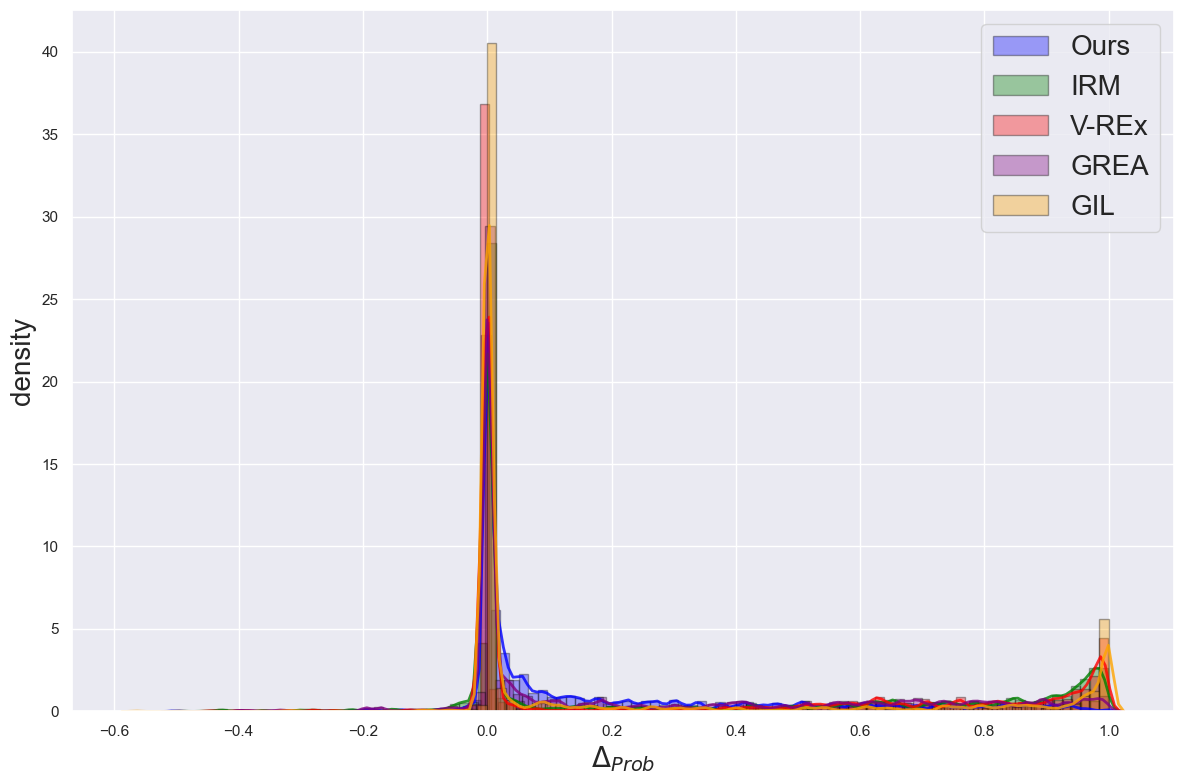

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import wasserstein_distance
from sklearn.utils import resample
from scipy.integrate import simps

sns.set(style='darkgrid')
# List of numpy arrays with varying lengths (example data)
list_of_res = [res_mine,res_irm,res_vrex,res_grea,res_gil]

# Define a list of colors for different histograms and KDE plots
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'cyan']
labels = ['Ours','IRM','V-REx','GREA','GIL']
# Target size for resampling
target_size = len(res_mine)

# Initialize the plot
plt.figure(figsize=(12, 8))

# Initialize a list to store the metrics
metrics = []
auc_values = []

# Loop through the list of numpy arrays
for i, res in enumerate(list_of_res):
    # Resample the array to the target size
    if len(res) != target_size:
        res = resample(res, n_samples=target_size, random_state=0)
    
    # Plot histogram
    plt.hist(res, bins=100, edgecolor='black', density=True, alpha=0.35, color=colors[i % len(colors)], label=labels[i])
    
    # Add KDE curve
    kde = sns.kdeplot(res, color=colors[i % len(colors)], bw_adjust=0.1,alpha=0.8,linewidth=2)
    
    # Calculate the metric (Wasserstein distance to a distribution centered at 0)
    metric = wasserstein_distance(res, np.zeros_like(res))
    metrics.append(metric)
    # plt.text(0.95, 0.95 - i * 0.05, f'Data {i+1}: {metric:.4f}', transform=plt.gca().transAxes, fontsize=10, verticalalignment='top', color=colors[i % len(colors)])

    # Calculate the area under the curve from 0.5 to 1.0
    kde_x, kde_y = kde.get_lines()[-1].get_data()
    mask = (kde_x >= 0.3) & (kde_x <= 1.0)
    x = kde_x[mask]
    y = kde_y[mask]
    auc = simps(y, x)
    auc_values.append(auc)
    
    # Print the AUC value
    print(f'{labels[i]}: AUC from 0.3 to 1.0 = {auc:.4f}')
    
# Add title and labels
# plt.title('Histogram and KDE of Multiple 1D Numpy Arrays')
plt.xlabel(r'$\Delta_{Prob}$',fontsize = 20)
plt.ylabel('density',fontsize=20)
# plt.yscale('log')
plt.legend(fontsize = 20)
# plt.ylim(0, 1)
plt.tight_layout()
# Show the plot
plt.savefig("ExpFigures/deltaAcc_dist/sp6.pdf")

# Return the list of metrics
print("Wasserstein distances to a distribution centered at 0:", metrics)



# visualize nmi for clustering

In [32]:
inputs = [(0.88,0.88,0.63),(0.17,0.99,0.99),(0.42,0.37,0.36)]
inputs_2 = [(0.78,1.0,1.0),(0.48,1.0,1.0),(0.38,1.0,0.46)]

inputs = [np.mean(np.asarray(i)) for i in inputs]
inputs_2 = [np.mean(np.asarray(i)) for i in inputs_2]
# missing sp-0.40033

inputs3 = [(0.98,0.98,0.97),(0.48,0.98,0.58),(0.47,0.35,0.37)]
inputs3_2 = [(0.99,0.99,0.98),(0.95,0.98,0.51),(0.38,0.48,0.51)]

inputs3 = [float(np.mean(np.asarray(i))) for i in inputs3]
inputs3_2 = [float(np.mean(np.asarray(i))) for i in inputs3_2]


sp_raw_infoamx = inputs + inputs3
sp_biased_infomax = inputs_2 + inputs3_2



['SPMotif-0.40(#$G_c$=1)', 'SPMotif-0.80(#$G_c$=1)', 'SPMotif-0.90(#$G_c$=1)', 'SPMotif-0.40(#$G_c$=3)', 'SPMotif-0.80(#$G_c$=3)', 'SPMotif-0.90(#$G_c$=3)']


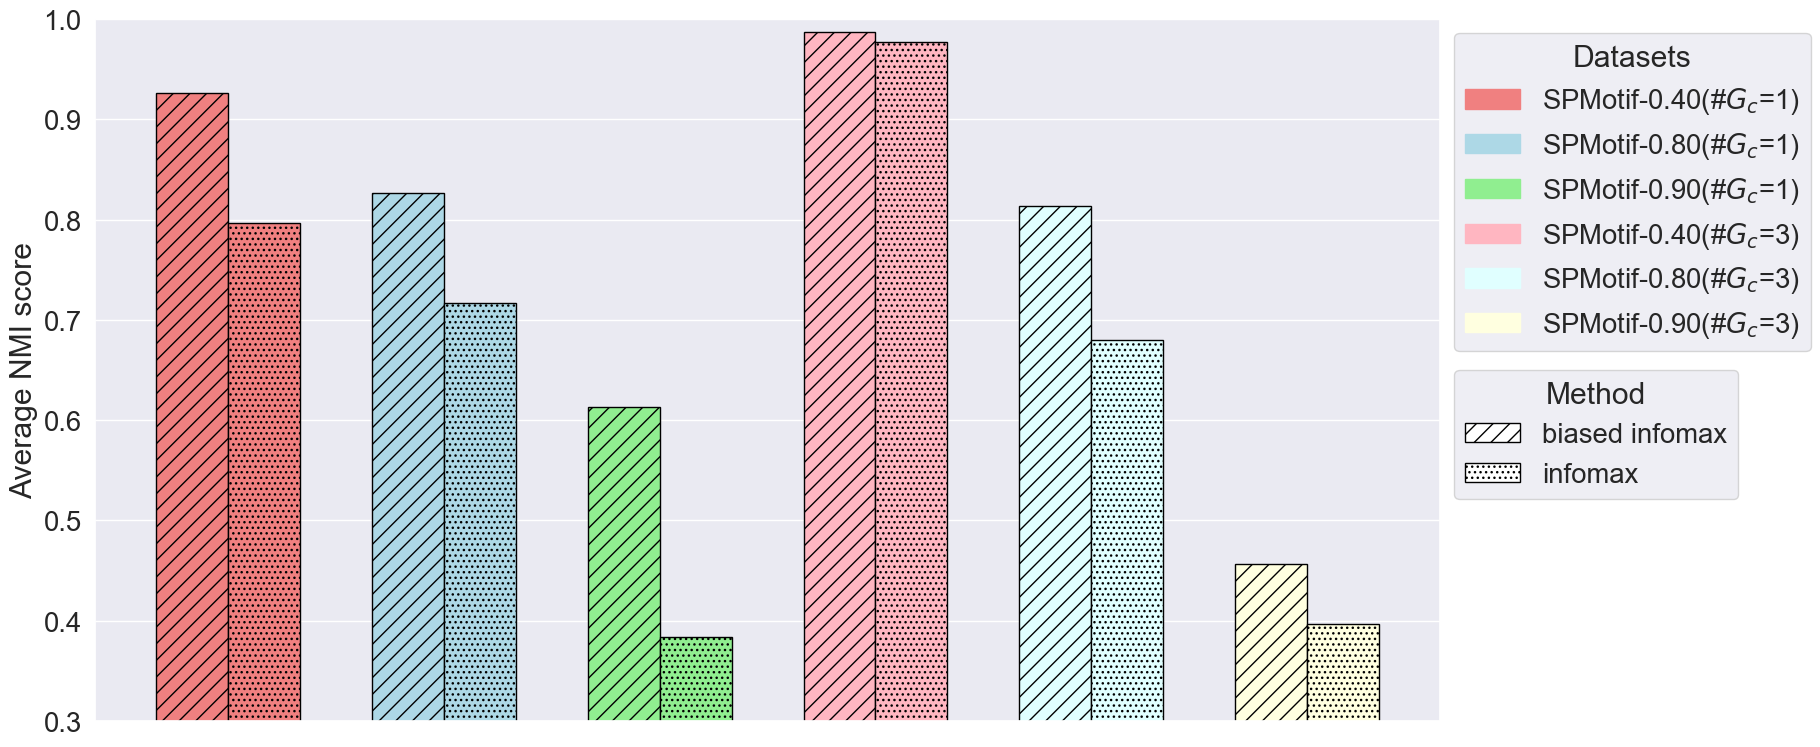

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
import numpy as np

def plot_bar_chart(data):
    sns.set(style='darkgrid', font_scale=1.8)
    plt.rcParams.update({'font.size': 24})
    """
    Plots a bar chart for the given data.

    Parameters:
    data (dict): A dictionary containing the dataset names as keys and values as a tuple of two values.
                 Each tuple represents (ERM value, EQD-GNN value).
                 Example: {'SPMotif-0.40(#G_c=1)': (0.9266666666666667, 0.7966666666666667), ...}

    Returns:
    None: The function creates and displays a bar chart.
    """
    datasets = list(data.keys())
    # Assigning specific colors to each dataset
    color_list = [
        mcolors.CSS4_COLORS['lightcoral'],
        mcolors.CSS4_COLORS['lightblue'],
        mcolors.CSS4_COLORS['lightgreen'],
        mcolors.CSS4_COLORS['lightpink'],
        mcolors.CSS4_COLORS['lightcyan'],
        mcolors.CSS4_COLORS['lightyellow']
    ]

    # Number of bars per group
    n_bars = 2  # Two bars per class (ERM and EQD-GNN)

    # Setting the positions and width for the bars
    pos = np.arange(len(datasets))
    bar_width = 0.35
    group_width = bar_width * n_bars + bar_width  # Width of a group plus extra space for separation

    # Creating the plot
    plt.figure(figsize=(18, 8))
    legend_labels = []

    for i, dataset in enumerate(datasets):
        dataset_pos = i * group_width
        erm_val, eqd_val = data[dataset]
        plt.bar(dataset_pos, erm_val, bar_width, color=color_list[i], hatch='//', edgecolor='black')
        plt.bar(dataset_pos + bar_width, eqd_val, bar_width, color=color_list[i], hatch='...', edgecolor='black')
        legend_labels.append(dataset)

    # Adding labels and title
    plt.ylabel('Average NMI score')
    plt.ylim(0.3, 1.0)
    plt.xticks([])

    # Adding legends
    handles = [plt.Rectangle((0,0),1,1, color=color_list[i]) for i in range(len(datasets))]
    print (datasets)
    dataset_legend = plt.legend(handles, datasets, title='Datasets', bbox_to_anchor=(1.0, 1.0), loc='upper left')
    plt.gca().add_artist(dataset_legend)

    hatch_handles = [
        plt.Rectangle((0,0),1,1, edgecolor='black', facecolor='white', hatch='//'),
        plt.Rectangle((0,0),1,1, edgecolor='black', facecolor='white', hatch='...')
    ]
    plt.legend(hatch_handles, ['biased infomax', 'infomax'], title='Method', bbox_to_anchor=(1.0, 0.52), loc='upper left')

    plt.tight_layout()
    # Displaying the plot
    # plt.savefig('ExpFigures/cluster_nmi_spmotif.pdf')
    plt.show()

# Example data structure
data = {
    r'SPMotif-0.40(#$G_c$=1)': (0.9266666666666667, 0.7966666666666667),
    r'SPMotif-0.80(#$G_c$=1)': (0.8266666666666667, 0.7166666666666667),
    r'SPMotif-0.90(#$G_c$=1)': (0.6133333333333333, 0.3833333333333333),
    r'SPMotif-0.40(#$G_c$=3)': (0.9866666666666667, 0.9766666666666666),
    r'SPMotif-0.80(#$G_c$=3)': (0.8133333333333334, 0.68),
    r'SPMotif-0.90(#$G_c$=3)': (0.4566666666666667, 0.39666666666666667)
}

# Example function call
plot_bar_chart(data)


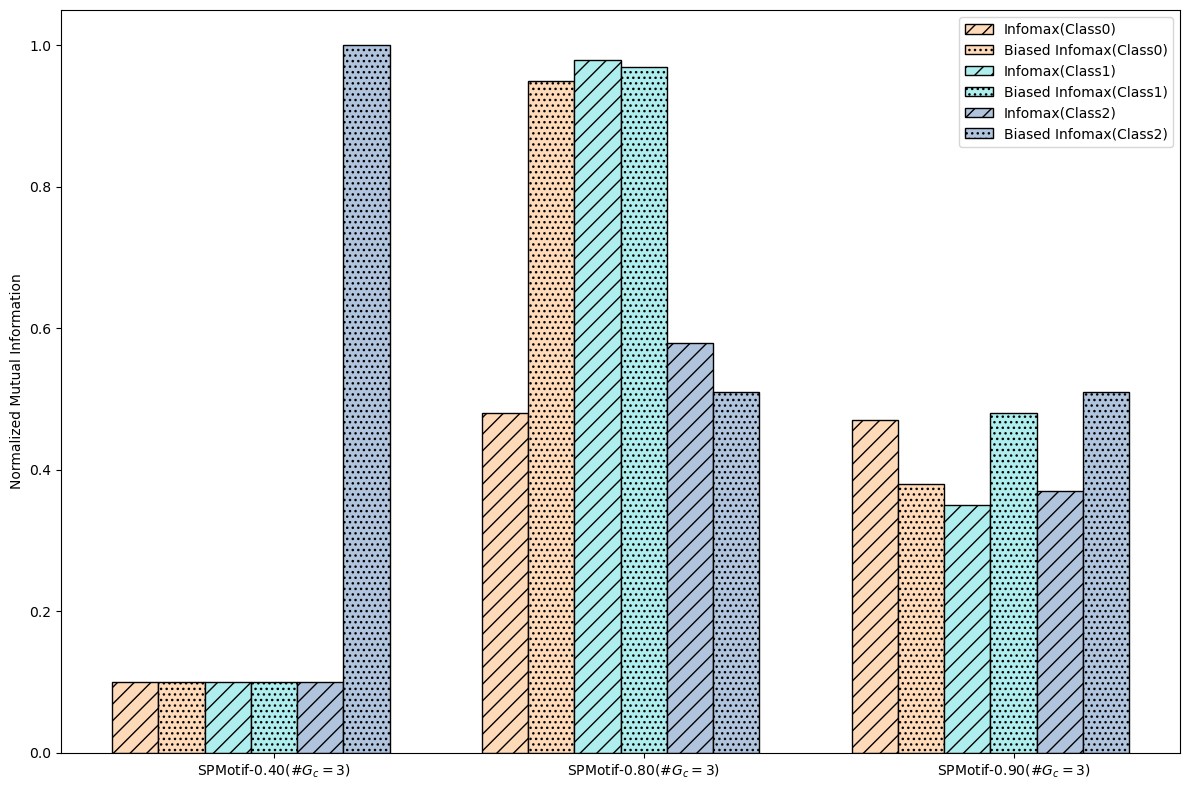

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

def plot_bar_chart(data):
    """
    Plots a bar chart for the given data.

    Parameters:
    data (dict): A dictionary containing the dataset names as keys and values as a list of tuples.
                 Each tuple represents (Class, ERM value, EQD-GNN value).
                 Example: {'SPMotif-0.4': [('Class0', 2.92, 0.53), ('Class1', 15.59, 3.79), ...], ...}

    Returns:
    None: The function creates and displays a bar chart.
    """
    datasets = list(data.keys())
    classes = set([cls for d in datasets for cls, _, _ in data[d]])
    class_colors = plt.cm.rainbow(np.linspace(0, 1, len(classes)))
    
    color_dict = {
        'Class0': mcolors.CSS4_COLORS['peachpuff'],            # 红色用于Class0
        'Class1': mcolors.CSS4_COLORS['paleturquoise'],       # 浅蓝色用于Class1
        'Class2':  mcolors.CSS4_COLORS['lightsteelblue']     # 浅紫色用于Class2
    }

    # Number of bars per group
    n_bars = len(classes) * 2  # Two bars (ERM, EQD-GNN) per class

    # Setting the positions and width for the bars
    pos = np.arange(len(datasets))
    bar_width = 0.15
    group_width = bar_width * n_bars + bar_width * 2  # Width of a group plus extra space for separation

    # Creating the plot
    plt.figure(figsize=(12, 8))
    legend_labels = set()

    for i, dataset in enumerate(datasets):
        dataset_pos = i * group_width
        for j, (cls, erm_val, eqd_val) in enumerate(data[dataset]):
            class_pos = dataset_pos + j * bar_width * 2
            erm_label = f'Infomax({cls})' if f'Infomax({cls})' not in legend_labels else None
            eqd_label = f'Biased Infomax({cls})' if f'Biased Infomax({cls})' not in legend_labels else None
            plt.bar(class_pos, erm_val, bar_width, label=erm_label, color=color_dict[cls], hatch='//', edgecolor='black')
            plt.bar(class_pos + bar_width, eqd_val, bar_width, label=eqd_label, color=color_dict[cls], hatch='...', edgecolor='black')
            legend_labels.update([f'Infomax({cls})', f'Biased Infomax({cls})'])

    # Adding labels and title
    # plt.xlabel('Datasets')
    plt.ylabel('Normalized Mutual Information')
    plt.xticks([i * group_width + bar_width * len(classes) for i in range(len(datasets))], datasets)
    plt.legend()
    plt.tight_layout()
    # Displaying the plot
    plt.savefig('ExpFigures/SP_Gc3_bar_chart.pdf')
    plt.show()

# data = {
#     r'SPMotif-0.40(#$G_c=1$)': [
#         ('Class0', 0.88, 0.78), 
#         ('Class1', 0.88, 1.0), 
#         ('Class2', 0.63, 1.0)
#     ],
#     r'SPMotif-0.80(#$G_c=1$)': [
#         ('Class0', 0.17, 0.48), 
#         ('Class1', 0.99, 1.0), 
#         ('Class2', 0.99, 1.0)
#     ],
#     r'SPMotif-0.90(#$G_c=1$)': [
#         ('Class0', 0.42, 0.38), 
#         ('Class1', 0.37, 1.0), 
#         ('Class2', 0.36, 0.47)
#     ]
# }


data = {
    r'SPMotif-0.40(#$G_c=3$)': [
        ('Class0', 0.1, 0.1), 
        ('Class1', 0.1, 0.1), 
        ('Class2', 0.1, 1)
    ],
    r'SPMotif-0.80(#$G_c=3$)': [
        ('Class0', 0.48, 0.95), 
        ('Class1', 0.98, 0.97), 
        ('Class2', 0.58, 0.51)
    ],
    r'SPMotif-0.90(#$G_c=3$)': [
        ('Class0', 0.47, 0.38), 
        ('Class1', 0.35, 0.48), 
        ('Class2', 0.37, 0.51)
    ]
}


plot_bar_chart(data)



# visualize ablation study for w/o biased infomax and w/o intra-class ce loss

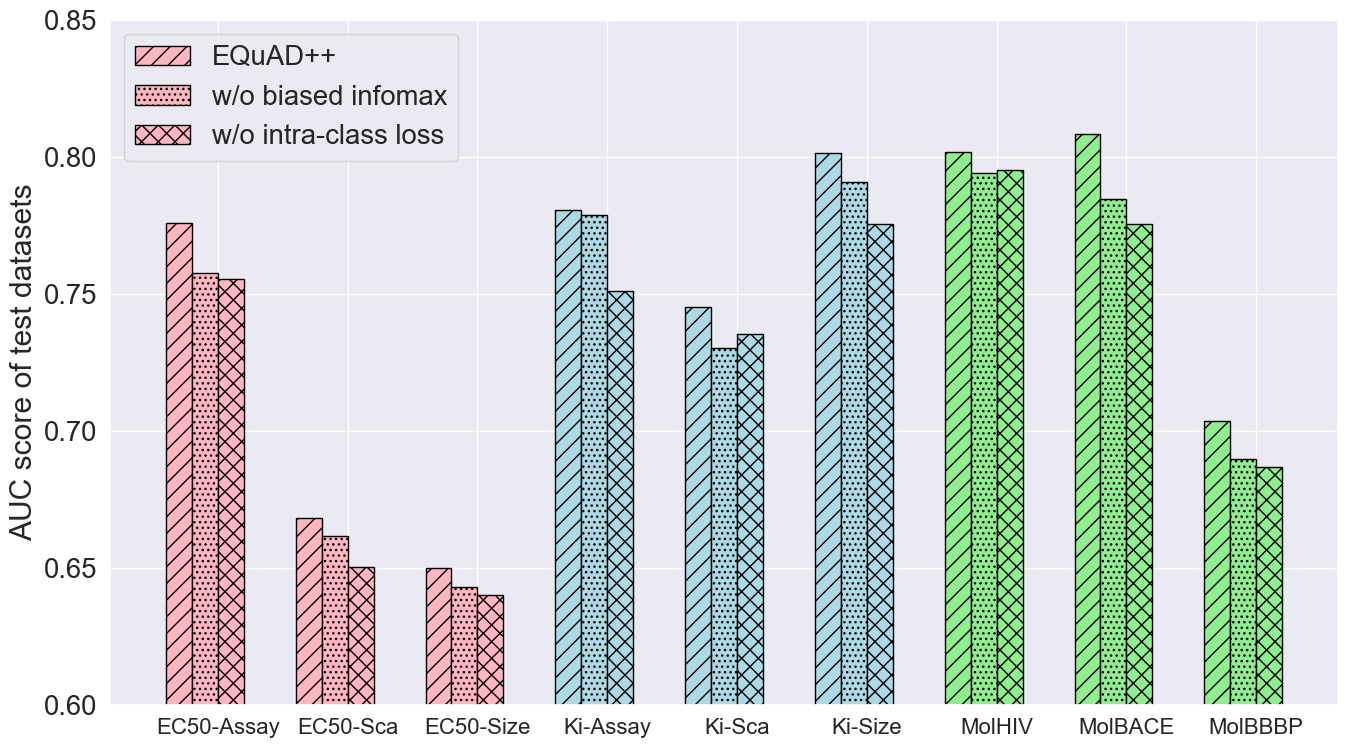

In [67]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors
import seaborn as sns


def plot_bar_chart(data):
    sns.set(style='darkgrid',font_scale=1.8)
    plt.rcParams.update({'font.size': 24})
    """
    Plots a bar chart for the given data.

    Parameters:
    data (dict): A dictionary containing the dataset names as keys and values as a list of tuples.
                 Each tuple represents (Class, ERM value, EQD-GNN value, another value).
                 Example: {'SPMotif-0.4': [('Class0', 2.92, 0.53, 1.23)], ...}

    Returns:
    None: The function creates and displays a bar chart.
    """
    datasets = list(data.keys())
    # Assigning specific colors to groups of datasets
    color_list = [
        mcolors.CSS4_COLORS['lightpink'],      # Color for first three datasets
        mcolors.CSS4_COLORS['lightblue'],       # Color for second three datasets
        mcolors.CSS4_COLORS['lightgreen']       # Color for final three datasets
    ]

    color_dict = {}
    for i, dataset in enumerate(datasets):
        if i < 3:
            color_dict[dataset] = color_list[0]
        elif 3 <= i < 6:
            color_dict[dataset] = color_list[1]
        else:
            color_dict[dataset] = color_list[2]

    # Number of bars per group
    n_bars = 3  # Three bars per class (ERM, EQD-GNN, and the third value)

    # Setting the positions and width for the bars
    pos = np.arange(len(datasets))
    bar_width = 0.2
    group_width = bar_width * n_bars + bar_width * 2  # Width of a group plus extra space for separation

    # Creating the plot
    plt.figure(figsize=(14, 8))
    legend_labels = set()

    for i, dataset in enumerate(datasets):
        dataset_pos = i * group_width
        for j, (cls, erm_val, eqd_val, third_val) in enumerate(data[dataset]):
            class_pos = dataset_pos + j * bar_width * 3
            erm_label = f'EQuAD++' if f'EQuAD++' not in legend_labels else None
            eqd_label = f'w/o biased infomax' if f'w/o biased infomax' not in legend_labels else None
            third_label = f'w/o intra-class loss' if f'w/o intra-class loss' not in legend_labels else None
            plt.bar(class_pos, erm_val, bar_width, label=erm_label, color=color_dict[dataset], hatch='//', edgecolor='black')
            plt.bar(class_pos + bar_width, eqd_val, bar_width, label=eqd_label, color=color_dict[dataset], hatch='...', edgecolor='black')
            plt.bar(class_pos + bar_width * 2, third_val, bar_width, label=third_label, color=color_dict[dataset], hatch='xx', edgecolor='black')
            legend_labels.update([f'EQuAD++', f'w/o biased infomax', f'w/o intra-class loss'])

    # Adding labels and title
    plt.ylabel('AUC score of test datasets')
    plt.ylim(0.6, 0.85)
    plt.xticks([i * group_width + bar_width * 1.5 for i in range(len(datasets))], datasets,fontsize=16)
    plt.legend()
    plt.tight_layout()
    # Displaying the plot
    # plt.show()
    plt.savefig('ExpFigures/ablation_study.pdf')

data = {
    r'EC50-Assay': [
        ('Class0', 0.7758, 0.7578, 0.7553)
    ],
    r'EC50-Sca': [
        ('Class0', 0.6681, 0.6615, 0.6503)
    ],
    r'EC50-Size': [
        ('Class0', 0.6498, 0.6429, 0.6401)
    ],
    r'Ki-Assay': [
        ('Class0', 0.7806, 0.7789, 0.7510)
    ],
    r'Ki-Sca': [
        ('Class0', 0.7454, 0.7302, 0.7352)
    ],
    r'Ki-Size': [
        ('Class0', 0.8014, 0.7907, 0.7754)
    ],
    r'MolHIV': [
        ('Class0', 0.8017, 0.7941, 0.7954)
    ],
    r'MolBACE': [
        ('Class0', 0.8084, 0.7845, 0.7756)
    ],
    r'MolBBBP': [
        ('Class0', 0.7036, 0.6897, 0.6869)
    ]
}

plot_bar_chart(data)


# hyper-params analysis

In [169]:
import pandas as pd

def get_top_test_score(data, conditions: dict) -> tuple:
    """
    Reads the CSV file, filters rows according to the conditions, and returns the top test_score_mean and the corresponding test_score_std.

    Parameters:
    - file_path (str): Path to the CSV file.
    - conditions (dict): Dictionary containing the filtering conditions.

    Returns:
    - tuple: (top_test_score_mean, corresponding_test_score_std)
    """

    # Apply the filtering conditions
    for key, value in conditions.items():
        data = data[data[key] == value]

    # Get the row with the highest test_score_mean
    top_row = data.loc[data['test_score_mean'].idxmax()]

    # Extract the test_score_mean and test_score_std
    top_test_score_mean = top_row['test_score_mean']
    corresponding_test_score_std = top_row['test_score_std']

    return top_test_score_mean, corresponding_test_score_std




In [191]:
data = pd.read_csv('excel_formal/intraCluster_v2/ogbg-molhiv_results.csv')


In [192]:
gamma = [0.1,0.3,0.5,0.7]
c = [2,3,5,10]
res = {}
for g in gamma:
    for c_ in c:
        conditions = {'gamma': g, 'numCluster': c_}
        top_test_score_mean, corresponding_test_score_std = get_top_test_score(data, conditions)
        res[(g,c_)] = top_test_score_mean



In [193]:
# res[(0.3,5)]=0.7806111
res

{(0.1, 2): 0.784496129,
 (0.1, 3): 0.794460595,
 (0.1, 5): 0.786516249,
 (0.1, 10): 0.788226873,
 (0.3, 2): 0.784140795,
 (0.3, 3): 0.785133988,
 (0.3, 5): 0.794147253,
 (0.3, 10): 0.783840954,
 (0.5, 2): 0.801177084,
 (0.5, 3): 0.787036747,
 (0.5, 5): 0.783045232,
 (0.5, 10): 0.790190041,
 (0.7, 2): 0.781286329,
 (0.7, 3): 0.781103373,
 (0.7, 5): 0.785673708,
 (0.7, 10): 0.783107072}

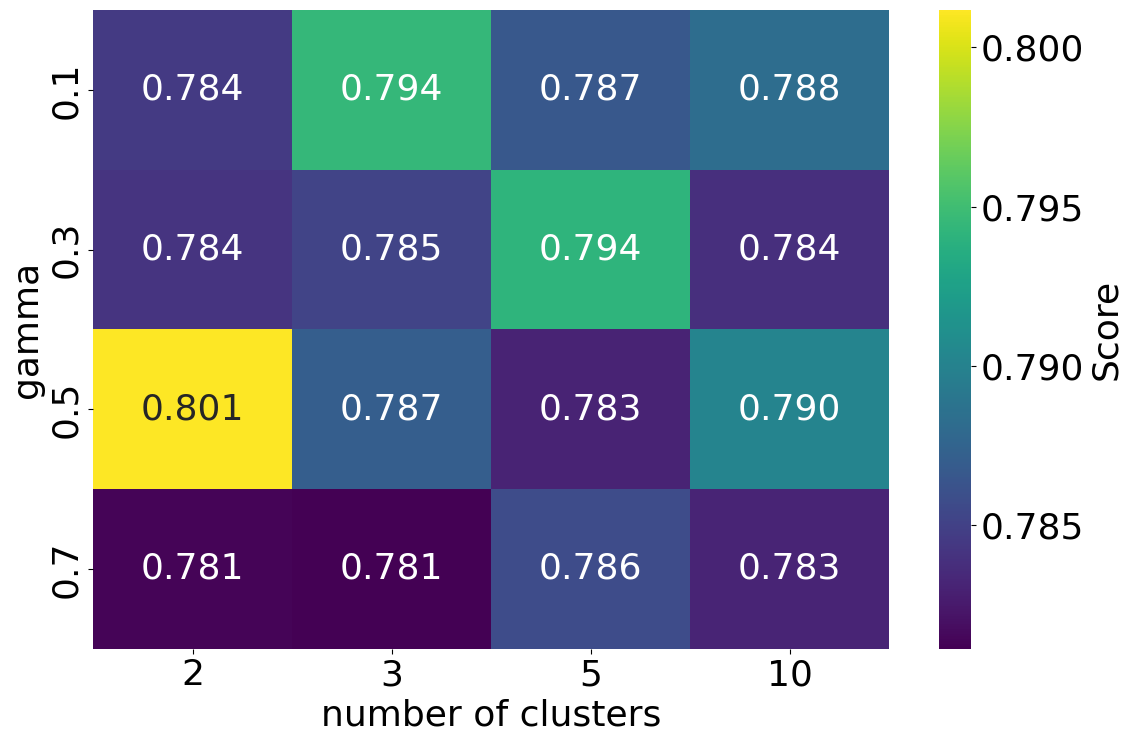

In [194]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.rcParams.update({'font.size': 26})

def create_heatmap(data_dict, gammas, clusters):
    """
    Creates a heatmap from a given dictionary of values with gamma and numCluster keys.

    Parameters:
    - data_dict (dict): Dictionary containing the values with (gamma, numCluster) keys.
    - gammas (list): List of gamma values.
    - clusters (list): List of numCluster values.

    Returns:
    - None
    """
    # Create a matrix to hold the values for the heatmap
    heatmap_data = np.zeros((len(gammas), len(clusters)))

    # Populate the matrix with values from the dictionary
    for i, gamma in enumerate(gammas):
        for j, cluster in enumerate(clusters):
            heatmap_data[i, j] = data_dict.get((gamma, cluster), np.nan)

    # Create a DataFrame for the heatmap
    heatmap_df = pd.DataFrame(heatmap_data, index=gammas, columns=clusters)

    # Plot the heatmap with annotations formatted to 3 decimal places
    plt.figure(figsize=(12, 8))
    sns.heatmap(heatmap_df, annot=True, fmt=".3f", cmap="viridis", cbar_kws={'label': 'Score'})
    plt.xlabel('number of clusters')
    plt.ylabel('gamma')
    plt.tight_layout()
    plt.savefig('ExpFigures/heatmap_molhiv.pdf')
    # plt.title('Heatmap of Scores by Gamma and Number of Clusters')
    # plt.show()





gammas = [0.1, 0.3, 0.5, 0.7]
clusters = [2, 3, 5,10]

create_heatmap(res, gammas, clusters)


In [201]:
def create_heatmap_V2(data_dict, gammas, clusters):
    """
    Creates a heatmap from a given dictionary of values with gamma and numCluster keys.

    Parameters:
    - data_dict (dict): Dictionary containing the values with (gamma, numCluster) keys.
    - gammas (list): List of gamma values.
    - clusters (list): List of numCluster values.

    Returns:
    - None
    """
    # Create a matrix to hold the values for the heatmap
    heatmap_data = np.zeros((len(gammas), len(clusters)))

    # Populate the matrix with values from the dictionary
    for i, gamma in enumerate(gammas):
        for j, cluster in enumerate(clusters):
            heatmap_data[i, j] = data_dict.get((gamma, cluster), np.nan)

    # Create a DataFrame for the heatmap
    heatmap_df = pd.DataFrame(heatmap_data, index=gammas, columns=clusters)

    # Plot the heatmap with annotations formatted to 3 decimal places
    plt.figure(figsize=(12, 8))
    sns.heatmap(heatmap_df, annot=True, fmt=".3f", cmap="viridis", cbar_kws={'label': 'Score'})
    plt.xlabel('epoch')
    plt.ylabel('gamma')
    plt.tight_layout()
    plt.savefig('ExpFigures/heatmap_epoch_ki_assay.pdf')
    # plt.title('Heatmap of Scores by Gamma and Number of Clusters')
    plt.show()



In [202]:
data = pd.read_csv('excel_formal/intraCluster_v2/drugood_lbap_core_ki_assay_results.csv')

In [203]:
gamma = [0.1,0.3,0.5,0.7]
epoch = [50,60,70,80,90]
res = {}
for g in gamma:
    for e in epoch:
        conditions = {'gamma': g, 'epoch': e}
        top_test_score_mean, corresponding_test_score_std = get_top_test_score(data, conditions)
        res[(g,e)] = top_test_score_mean




In [205]:
res[(0.3,70)]=0.7806111
res

{(0.1, 50): 0.770949632,
 (0.1, 60): 0.759031802,
 (0.1, 70): 0.7615996,
 (0.1, 80): 0.765548229,
 (0.1, 90): 0.75879848,
 (0.3, 50): 0.765622258,
 (0.3, 60): 0.76343286,
 (0.3, 70): 0.7806111,
 (0.3, 80): 0.777980596,
 (0.3, 90): 0.76969403,
 (0.5, 50): 0.778692305,
 (0.5, 60): 0.764032215,
 (0.5, 70): 0.765490592,
 (0.5, 80): 0.763295144,
 (0.5, 90): 0.768585563,
 (0.7, 50): 0.776010484,
 (0.7, 60): 0.757619262,
 (0.7, 70): 0.757705182,
 (0.7, 80): 0.763730824,
 (0.7, 90): 0.756187141}

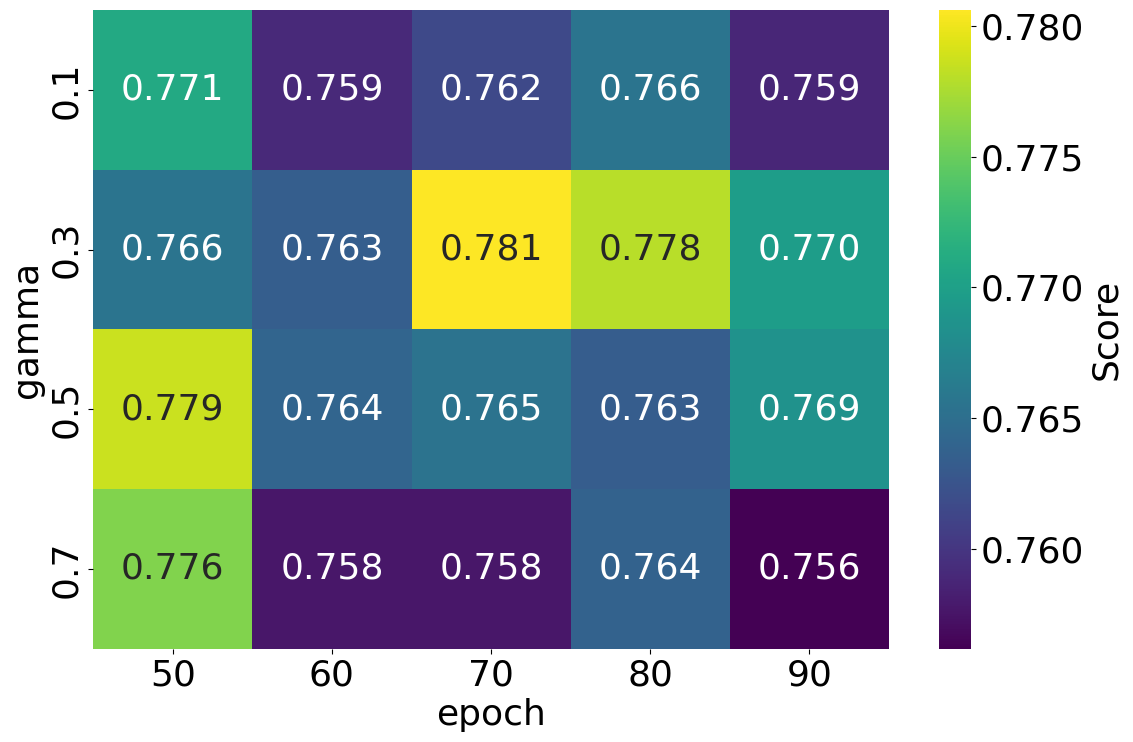

In [206]:
gammas = [0.1, 0.3, 0.5, 0.7]
epoch = [50,60,70,80,90]

create_heatmap_V2(res, gammas, epoch)



# add more G_c for motivation

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


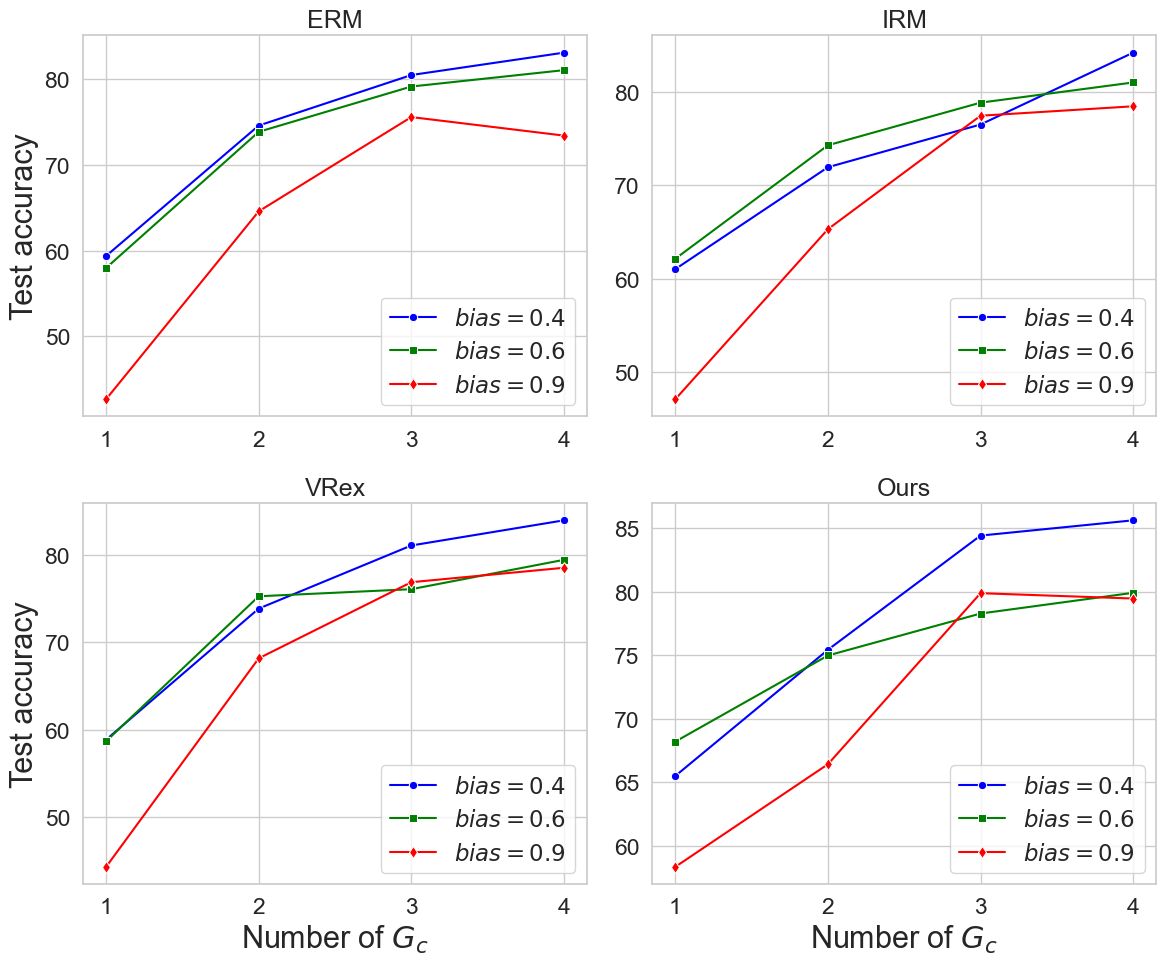

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the data with the 4th method added (called "Ours")
sp4 = [(59.37,61.01,58.86,65.51), (74.57,71.91,73.86,75.43), (80.46,76.48,81.08,84.41), (83.07,84.17,83.96,85.61)]
sp6 = [(57.97,62.12,58.69,68.21), (73.84,74.26,75.27,74.98), (79.12,78.82,76.08,78.28), (81.03,80.98,79.44,79.91)]
sp9 = [(42.67,47.09,44.31,58.36), (64.57,65.28,68.17,66.43), (75.56,77.42,76.88,79.88), (73.40,78.43,78.53,79.46)]

# Extract values for each method in each list
ERM_sp4 = [x[0] for x in sp4]
IRM_sp4 = [x[1] for x in sp4]
VRex_sp4 = [x[2] for x in sp4]
Ours_sp4 = [x[3] for x in sp4]

ERM_sp6 = [x[0] for x in sp6]
IRM_sp6 = [x[1] for x in sp6]
VRex_sp6 = [x[2] for x in sp6]
Ours_sp6 = [x[3] for x in sp6]

ERM_sp9 = [x[0] for x in sp9]
IRM_sp9 = [x[1] for x in sp9]
VRex_sp9 = [x[2] for x in sp9]
Ours_sp9 = [x[3] for x in sp9]

# X-axis points
x_axis = [1, 2, 3, 4]

# Set seaborn style for better aesthetics
sns.set(style="whitegrid",font_scale=1.5)

# Create a 2-by-2 layout of subplots where each subplot represents a method
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot for ERM across all lists
sns.lineplot(x=x_axis, y=ERM_sp4, marker='o', label=r'$bias=0.4$', color='blue', ax=axs[0, 0])
sns.lineplot(x=x_axis, y=ERM_sp6, marker='s', label=r'$bias=0.6$', color='green', ax=axs[0, 0])
sns.lineplot(x=x_axis, y=ERM_sp9, marker='d', label=r'$bias=0.9$', color='red', ax=axs[0, 0])
axs[0, 0].set_title('ERM')
axs[0, 0].set_xticks(x_axis)
axs[0, 0].set_xticklabels([1, 2, 3,4])
axs[0, 0].set_ylabel(r'Test accuracy', fontsize=22)
axs[0, 0].legend(loc='lower right')

# Plot for IRM across all lists
sns.lineplot(x=x_axis, y=IRM_sp4, marker='o', label=r'$bias=0.4$', color='blue', ax=axs[0, 1])
sns.lineplot(x=x_axis, y=IRM_sp6, marker='s', label=r'$bias=0.6$', color='green', ax=axs[0, 1])
sns.lineplot(x=x_axis, y=IRM_sp9, marker='d', label=r'$bias=0.9$', color='red', ax=axs[0, 1])
axs[0, 1].set_title('IRM')
axs[0, 1].set_xticks(x_axis)
axs[0, 1].set_xticklabels([1, 2, 3,4])
axs[0, 1].legend(loc='lower right')

# Plot for VRex across all lists
sns.lineplot(x=x_axis, y=VRex_sp4, marker='o', label=r'$bias=0.4$', color='blue', ax=axs[1, 0])
sns.lineplot(x=x_axis, y=VRex_sp6, marker='s', label=r'$bias=0.6$', color='green', ax=axs[1, 0])
sns.lineplot(x=x_axis, y=VRex_sp9, marker='d', label=r'$bias=0.9$', color='red', ax=axs[1, 0])
axs[1, 0].set_title('VRex')
axs[1, 0].set_xticks(x_axis)
axs[1, 0].set_xticklabels([1, 2, 3,4])
axs[1, 0].set_xlabel(r'Number of $G_c$', fontsize=22)
axs[1, 0].set_ylabel(r'Test accuracy', fontsize=22)
axs[1, 0].legend(loc='lower right')

# Plot for Ours across all lists
sns.lineplot(x=x_axis, y=Ours_sp4, marker='o', label=r'$bias=0.4$', color='blue', ax=axs[1, 1])
sns.lineplot(x=x_axis, y=Ours_sp6, marker='s', label=r'$bias=0.6$', color='green', ax=axs[1, 1])
sns.lineplot(x=x_axis, y=Ours_sp9, marker='d', label=r'$bias=0.9$', color='red', ax=axs[1, 1])
axs[1, 1].set_title('Ours')
axs[1, 1].set_xticks(x_axis)
axs[1, 1].set_xticklabels([1, 2, 3,4])
axs[1, 1].set_xlabel(r'Number of $G_c$', fontsize=22)
axs[1, 1].legend(loc='lower right')


# Adjust layout and show the plot
plt.tight_layout()
# plt.savefig("plot_results/motivation_more_Gc.pdf")
# plt.show()


# more G_c more motivation V2

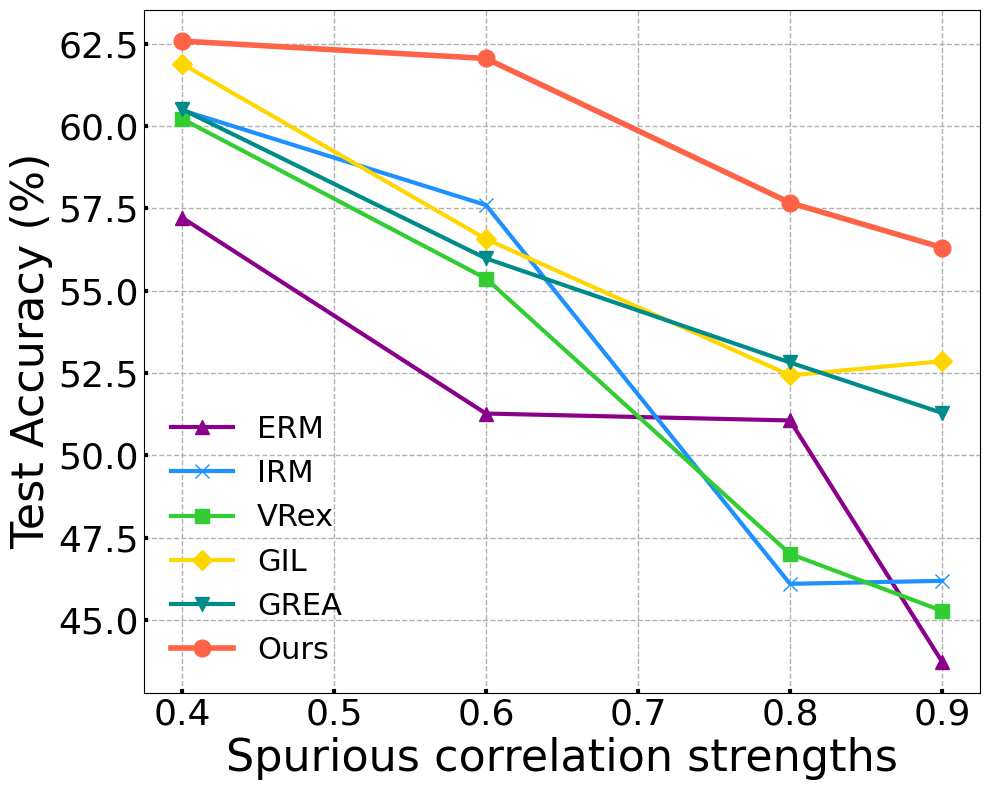

In [10]:
import matplotlib.pyplot as plt

# Set tick properties
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

# Make the ticks larger
plt.rcParams['xtick.major.size'] = 3  # Length of x-axis ticks
plt.rcParams['ytick.major.size'] = 3  # Length of y-axis ticks

# Optionally, increase the width of the ticks
plt.rcParams['xtick.major.width'] = 3  # Width of x-axis ticks
plt.rcParams['ytick.major.width'] = 3  # Width of y-axis ticks

def plot_results():
    # Data
    erm = [57.22, 51.27, 51.06, 43.74]
    irm = [60.48, 57.60, 46.10, 46.19]
    vrex = [60.22, 55.37, 47.01, 45.28]
    gil = [61.89, 56.57, 52.43, 52.86]
    grea = [60.51, 55.98, 52.82, 51.29]
    ours = [62.58, 62.05, 57.67, 56.31]

    # X-axis values
    x_values = [0.4, 0.6, 0.8, 0.9]

    # Colors for the lines (high contrast colors for better distinction)
    colors = ['#8B008B', '#1E90FF', '#32CD32', '#FFD700', '#008B8B', '#FF6347']  # Color for each method

    # Different markers for each method
    markers = ['^', 'x', 's', 'D', 'v', 'o']  # Square, diamond, downward triangle, and x-mark added

    # Create figure
    plt.figure(figsize=(10, 8))

    # Plotting each method with unique markers
    plt.plot(x_values, erm, label='ERM', color=colors[0], marker=markers[0], markersize=10, linewidth=3)
    plt.plot(x_values, irm, label='IRM', color=colors[1], marker=markers[1], markersize=10, linewidth=3)
    plt.plot(x_values, vrex, label='VRex', color=colors[2], marker=markers[2], markersize=10, linewidth=3)
    plt.plot(x_values, gil, label='GIL', color=colors[3], marker=markers[3], markersize=10, linewidth=3)
    plt.plot(x_values, grea, label='GREA', color=colors[4], marker=markers[4], markersize=10, linewidth=3)
    
    # Highlight 'Ours' with bold purple line and x-mark
    plt.plot(x_values, ours, label='Ours', color=colors[5], marker=markers[5], markersize=12, linewidth=4, linestyle='-')

    # Setting plot labels and title
    plt.xlabel('Spurious correlation strengths', fontsize=32)
    plt.ylabel('Test Accuracy (%)', fontsize=32)

    # Setting the font size of ticks
    plt.xticks(fontsize=26)
    plt.yticks(fontsize=26)

    # Add grid with dashed lines
    plt.grid(True, which='both', linestyle='--', linewidth=1)

    # Add a legend inside the plot
    plt.legend(fontsize=22, loc='best', frameon=False)

    # Save the plot with tight layout
    plt.tight_layout()
    
    plt.savefig("plot_results/ablation_more_v3.pdf", bbox_inches='tight', pad_inches=0.1)

# Call the function to plot
plot_results()
